# **Skyalp scenario**

In [1]:
from utils.utils import *
from utils.data import *

1. Hypothesis (to be modified)

In [2]:
# 2023 CO2 emissions 
CO2_2023 = 10000.0        # tCO2/yr

# Additionnal CO2 emissions per year 
CO2_supp = 10000.0        # tCO2/yr

# Considered period. WARNING : if you modify the period, read through the code to make the appropriate changes
debut = 2023
fin = 2030

# 2023 Free allowances
allowance_free_2023 = CO2_2023  # tCO2/yr

2. Data

In [3]:

# CO2 emissions array
nbr_annee = fin - debut +1
CO2_em = np.linspace(CO2_2023, CO2_supp * nbr_annee, nbr_annee)

volume_carbu_an = CO2_em * 1000000/(nrj_volum_kero * core_lca_kero)

# EU SAF incorporation objectives
incorpo_saf_eu = np.concatenate((np.linspace(obj_2023, obj_2025, 2025-debut+1)[:-1],
                                 np.linspace(obj_2025, obj_2030, fin-2025+1)))

# Carbon european quotas
quota_eu = np.array([quota_2023, quota_2024, quota_2025, quota_2026, 0, 0, 0, 0])

# Carbon price
carbonprice = np.linspace(carbonprice_2023, carbonprice_2030, fin-debut+1)

3. Incorporation rate (to be modified)

In [4]:
# Incorporation rates
incorpo_2023 = 0              # *100 %
incorpo_2024 = 0.05           # *100 %
incorpo_2025 = 0.10           # *100 %
incorpo_2026 = 0.15           # *100 %
incorpo_2027 = 0.20           # *100 %
incorpo_2028 = 0.30           # *100 %
incorpo_2029 = 0.40           # *100 %
incorpo_2030 = 0.50           # *100 %

incorpo_saf = np.array([incorpo_2023, incorpo_2024, incorpo_2025, incorpo_2026, incorpo_2027, incorpo_2028, incorpo_2029, incorpo_2030])


4. Computation

In [5]:
C_MP_k, C_CO2_k, C_MP_SAF, R_UE, C_MP_k0, C_CO2_k0 = calculs_with_saf(debut, fin, volume_carbu_an,incorpo_saf, allowance_free_2023, quota_eu, carbonprice, price_saf, price_kero, allowance_SAF)

5. Graphs

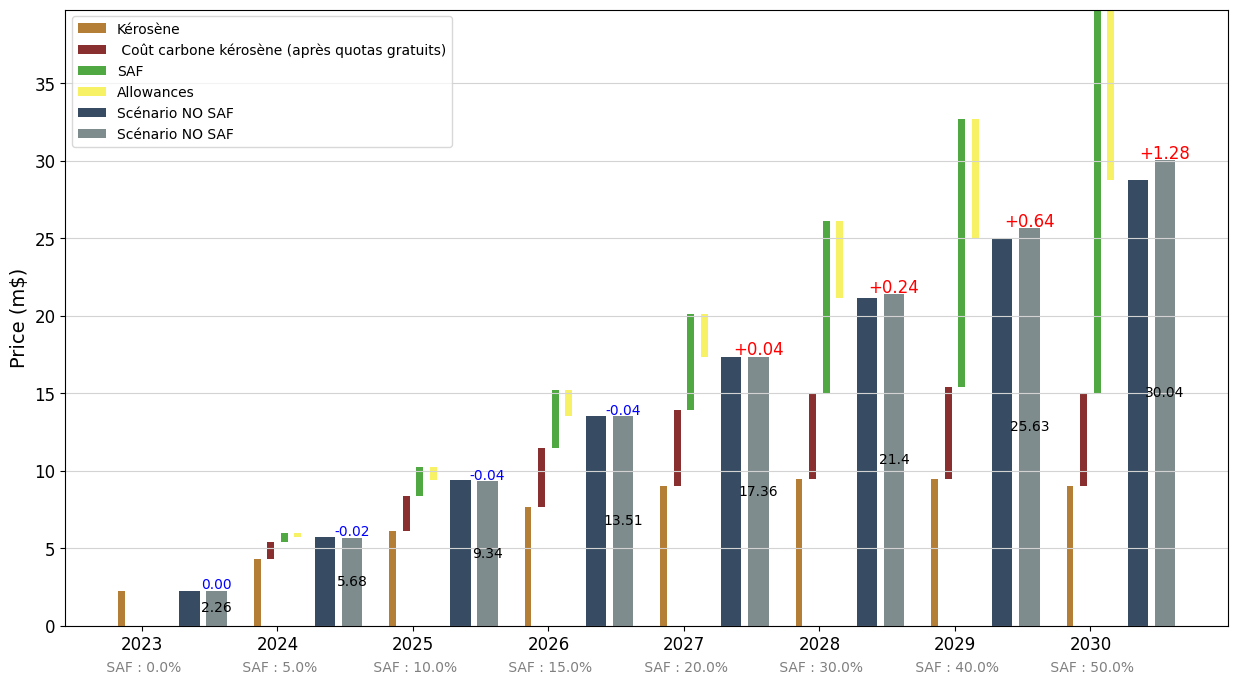

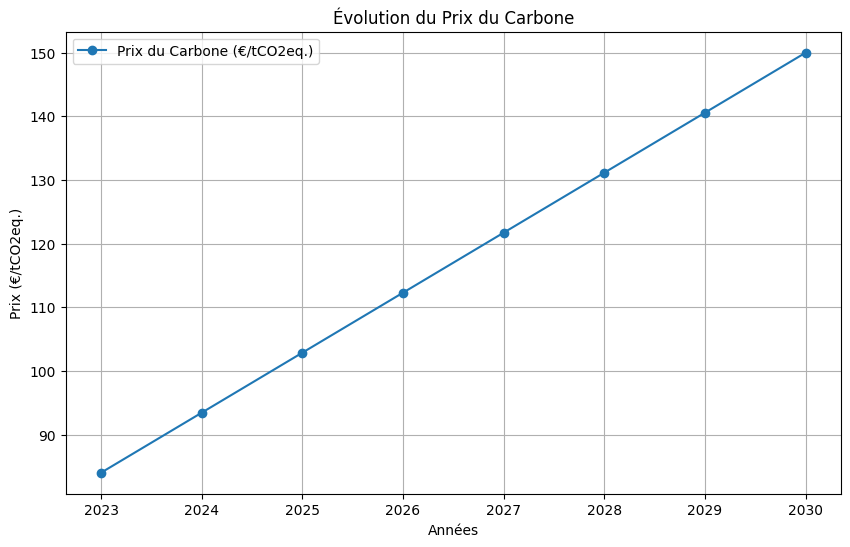

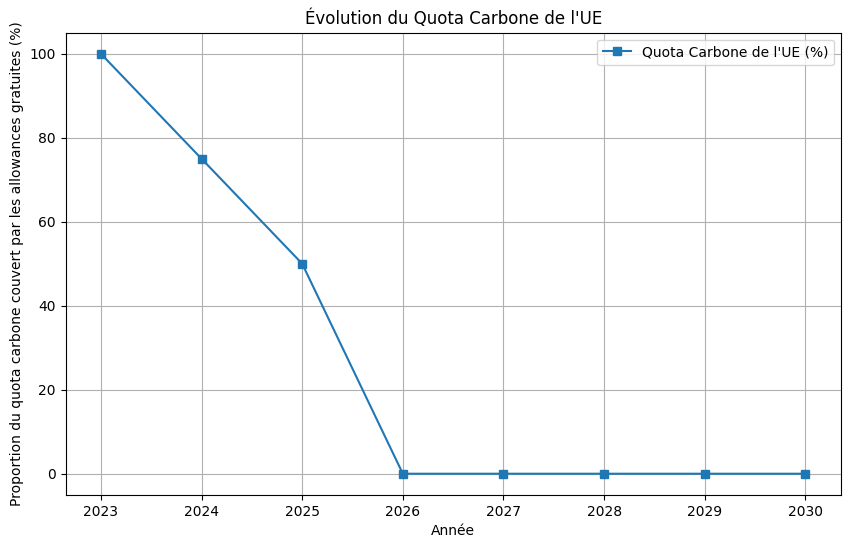

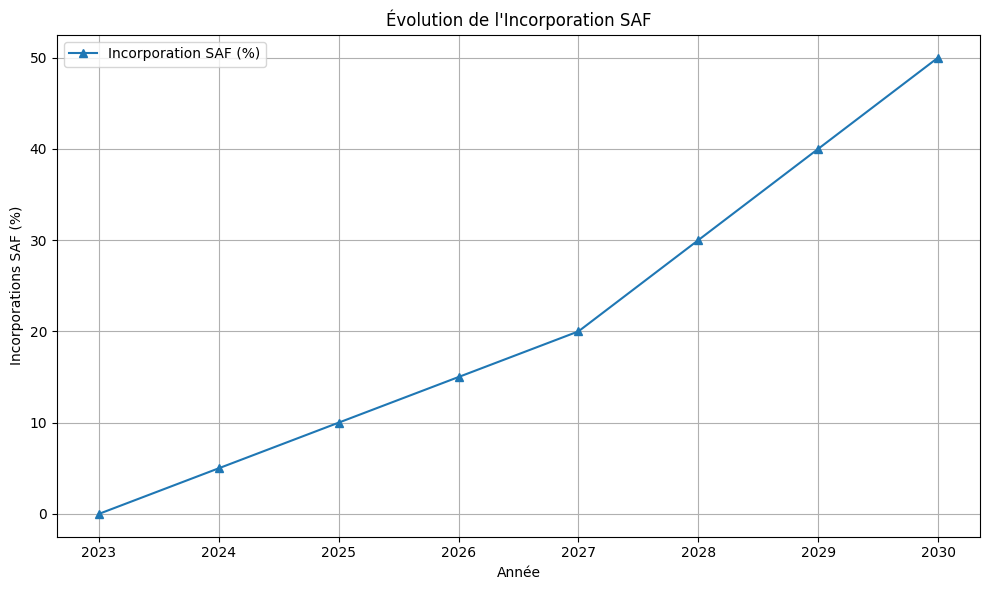

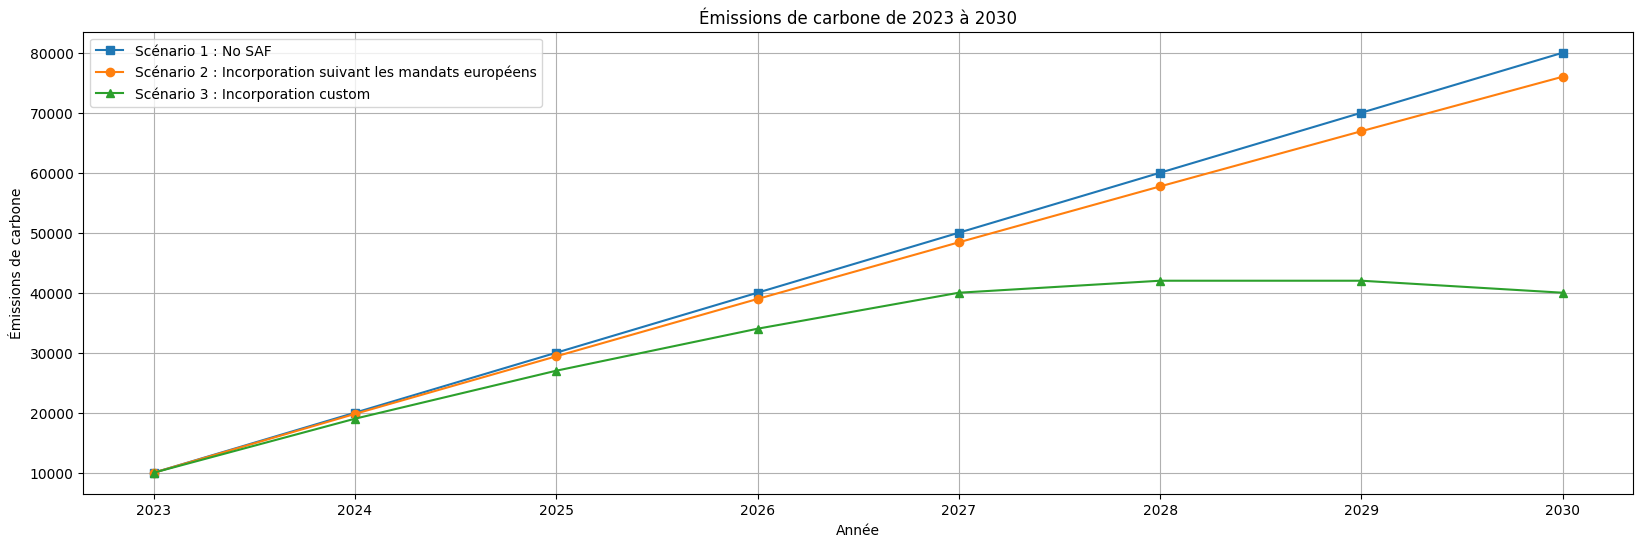

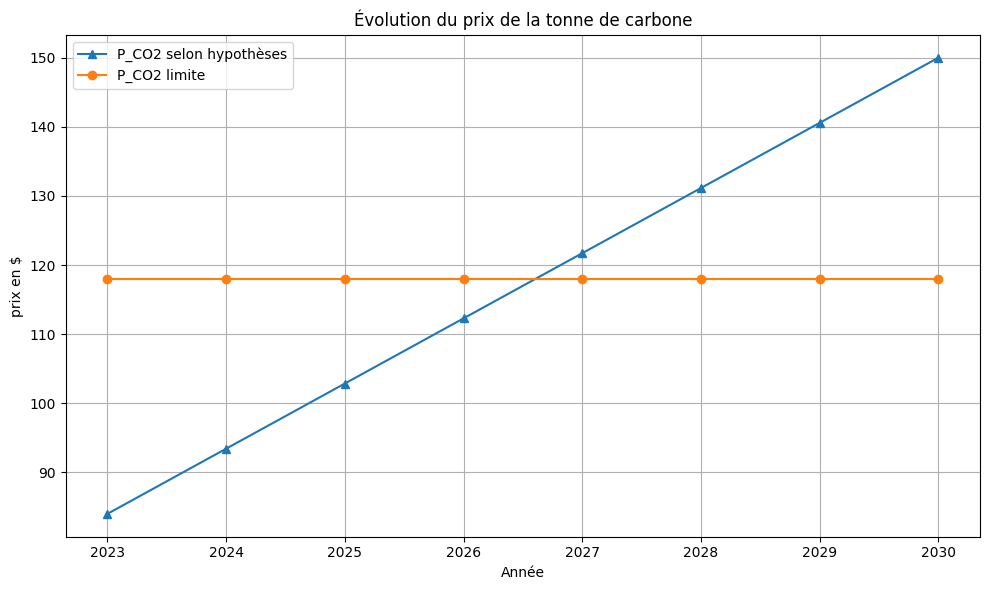

In [6]:
labels = ['Kérosène',
          ' Coût carbone kérosène (après quotas gratuits)',
          'SAF',
          'Allowances',
          'Prix Final',
          'Scénario NO SAF']

data = np.array([np.round(C_MP_k/1000000,2),
                 np.round(C_CO2_k/1000000,2),
                 np.round(C_MP_SAF/1000000,2),
                 np.round(R_UE/1000000,2),
                 np.round((C_MP_k+C_CO2_k+C_MP_SAF+R_UE)/1000000,2),
                 np.round((C_MP_k0 + C_CO2_k0)/1000000,2)])

if __name__ == '__main__':
    
    graphique(data, labels, debut, fin, incorpo_saf)
    graphique_hypotheses(debut, fin, carbonprice, quota_eu, incorpo_saf)
    graphique_emissionscarbone(CO2_em, incorpo_saf_eu, incorpo_saf)
    graphique_carbonprice(debut, fin, carbonprice, price_saf, price_kero, allowance_SAF)